## INSTRUCTIONS

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:
1.	Data from our life
2.	Classification

Follow the prompts in the attached jupyter notebook. We are using the same data as for the previous homeworks. Use the version you created called df2 where you already cleaned, dropped some of the variables but did not create dummy variables. Instead of creating dummy variables, you have to recode this column as suggested bellow.
Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible.

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.
Submission: Send in both a ipynb and a pdf file of your work.
Good luck!



# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a classification would be appropriate.

##Situation: Email Spam Detection

In everyday life, individuals and organizations receive a significant amount of emails, and distinguishing between legitimate emails and spam is crucial for productivity and security. In this scenario, a machine learning classification system can be employed to automatically categorize incoming emails as either "spam" or "not spam."

##Other examples

Medical Diagnosis:Classify patients into different disease categories (e.g., diabetes, cancer, heart disease) based on the available data.

Sentiment Analysis in Customer Reviews:Analyze the sentiment expressed in customer reviews (positive, negative, or neutral) to understand customer satisfaction and identify areas for improvement.

Image Recognition for Autonomous Vehicles:Classify objects in the environment (e.g., pedestrians, vehicles, traffic signs) based on image data from the vehicle's sensors.


# 2. Preprocessing

In our class we covered multiple classification methods. In this part of the home work you can compare them

**Use the dataset 'auto_imports1.csv' from our previous homeworks. More specifically, use the version you created called df2 where you already cleaned, dropped some of the variables but DID NOT CREATE dummy variables. Follow the prompts to complete the homework.**

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [57]:
path="/content/drive/MyDrive/DATASET/auto_imports1.csv"
df = pd.read_csv(path)


df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


In [58]:
data_types = df.dtypes
print(data_types)

fuel_type       object
body            object
wheel_base     float64
length         float64
width          float64
heights        float64
curb_weight      int64
engine_type     object
cylinders       object
engine_size      int64
bore            object
stroke          object
comprassion    float64
horse_power     object
peak_rpm        object
city_mpg         int64
highway_mpg      int64
price            int64
dtype: object


In [59]:
df = df.replace('?', None)

columns_to_convert = ['bore', 'stroke', 'horse_power', 'peak_rpm']
df[columns_to_convert] = df[columns_to_convert].astype('float64')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

In [61]:
df2 = df.drop(['body', 'engine_type', 'cylinders'], axis=1)

In [62]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [63]:
df2 = df2.dropna()

In [64]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

## 2.1 **Replace ['gas', 'diesel'] string values to [0, 1]**

In [65]:
#Your code
df2['fuel_type'] = df2['fuel_type'].replace({'gas': 0, 'diesel': 1})

In [66]:
print(df2['fuel_type'].tail(10))

191    0
192    0
193    0
194    0
195    0
196    0
197    0
198    0
199    1
200    0
Name: fuel_type, dtype: int64


## 2.2 : Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables

In [67]:
#your code
# Define X (independent variables)
X = df2.drop('fuel_type', axis=1)  # Assuming 'fuel_type' is the column you want to predict

# Define y (dependent variable)
y = df2['fuel_type']

## 2.3 Split your data into training and testing set. Use test_size=0.3, random_state=746 !

In [68]:
#your code
from sklearn.model_selection import train_test_split
#splitted the data with test_size=0.3, random_state=746 !
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)

#EDA on df2

##Step 1 :Descriptions and features

In [69]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [70]:
df2.tail()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
196,0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470
200,0,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114.0,5400.0,19,25,22625


In [71]:
df2.describe()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.102564,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,0.304170,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,0.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,0.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,1.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [72]:
df2.shape

(195, 15)

In [73]:
df2.columns

Index(['fuel_type', 'wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    195 non-null    int64  
 1   wheel_base   195 non-null    float64
 2   length       195 non-null    float64
 3   width        195 non-null    float64
 4   heights      195 non-null    float64
 5   curb_weight  195 non-null    int64  
 6   engine_size  195 non-null    int64  
 7   bore         195 non-null    float64
 8   stroke       195 non-null    float64
 9   comprassion  195 non-null    float64
 10  horse_power  195 non-null    float64
 11  peak_rpm     195 non-null    float64
 12  city_mpg     195 non-null    int64  
 13  highway_mpg  195 non-null    int64  
 14  price        195 non-null    int64  
dtypes: float64(9), int64(6)
memory usage: 24.4 KB


##Step 2 :Checking Missing value

In [75]:
print("There are {} missing values in the data.".format(df2.isna().sum().sum()))

There are 0 missing values in the data.


##Step 3 :Checking the shape of the data

<Figure size 2500x500 with 0 Axes>

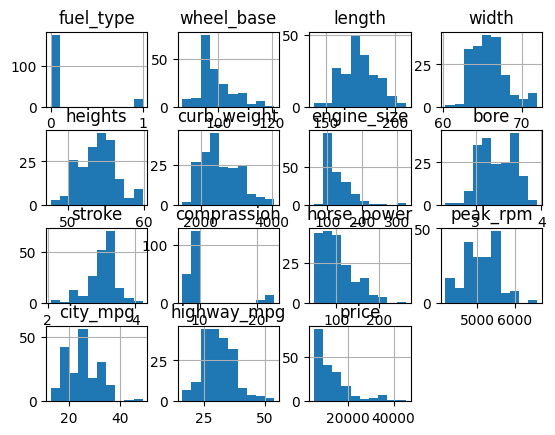

In [76]:
plt.figure(figsize=(25,5))
df2.hist()
plt.show()

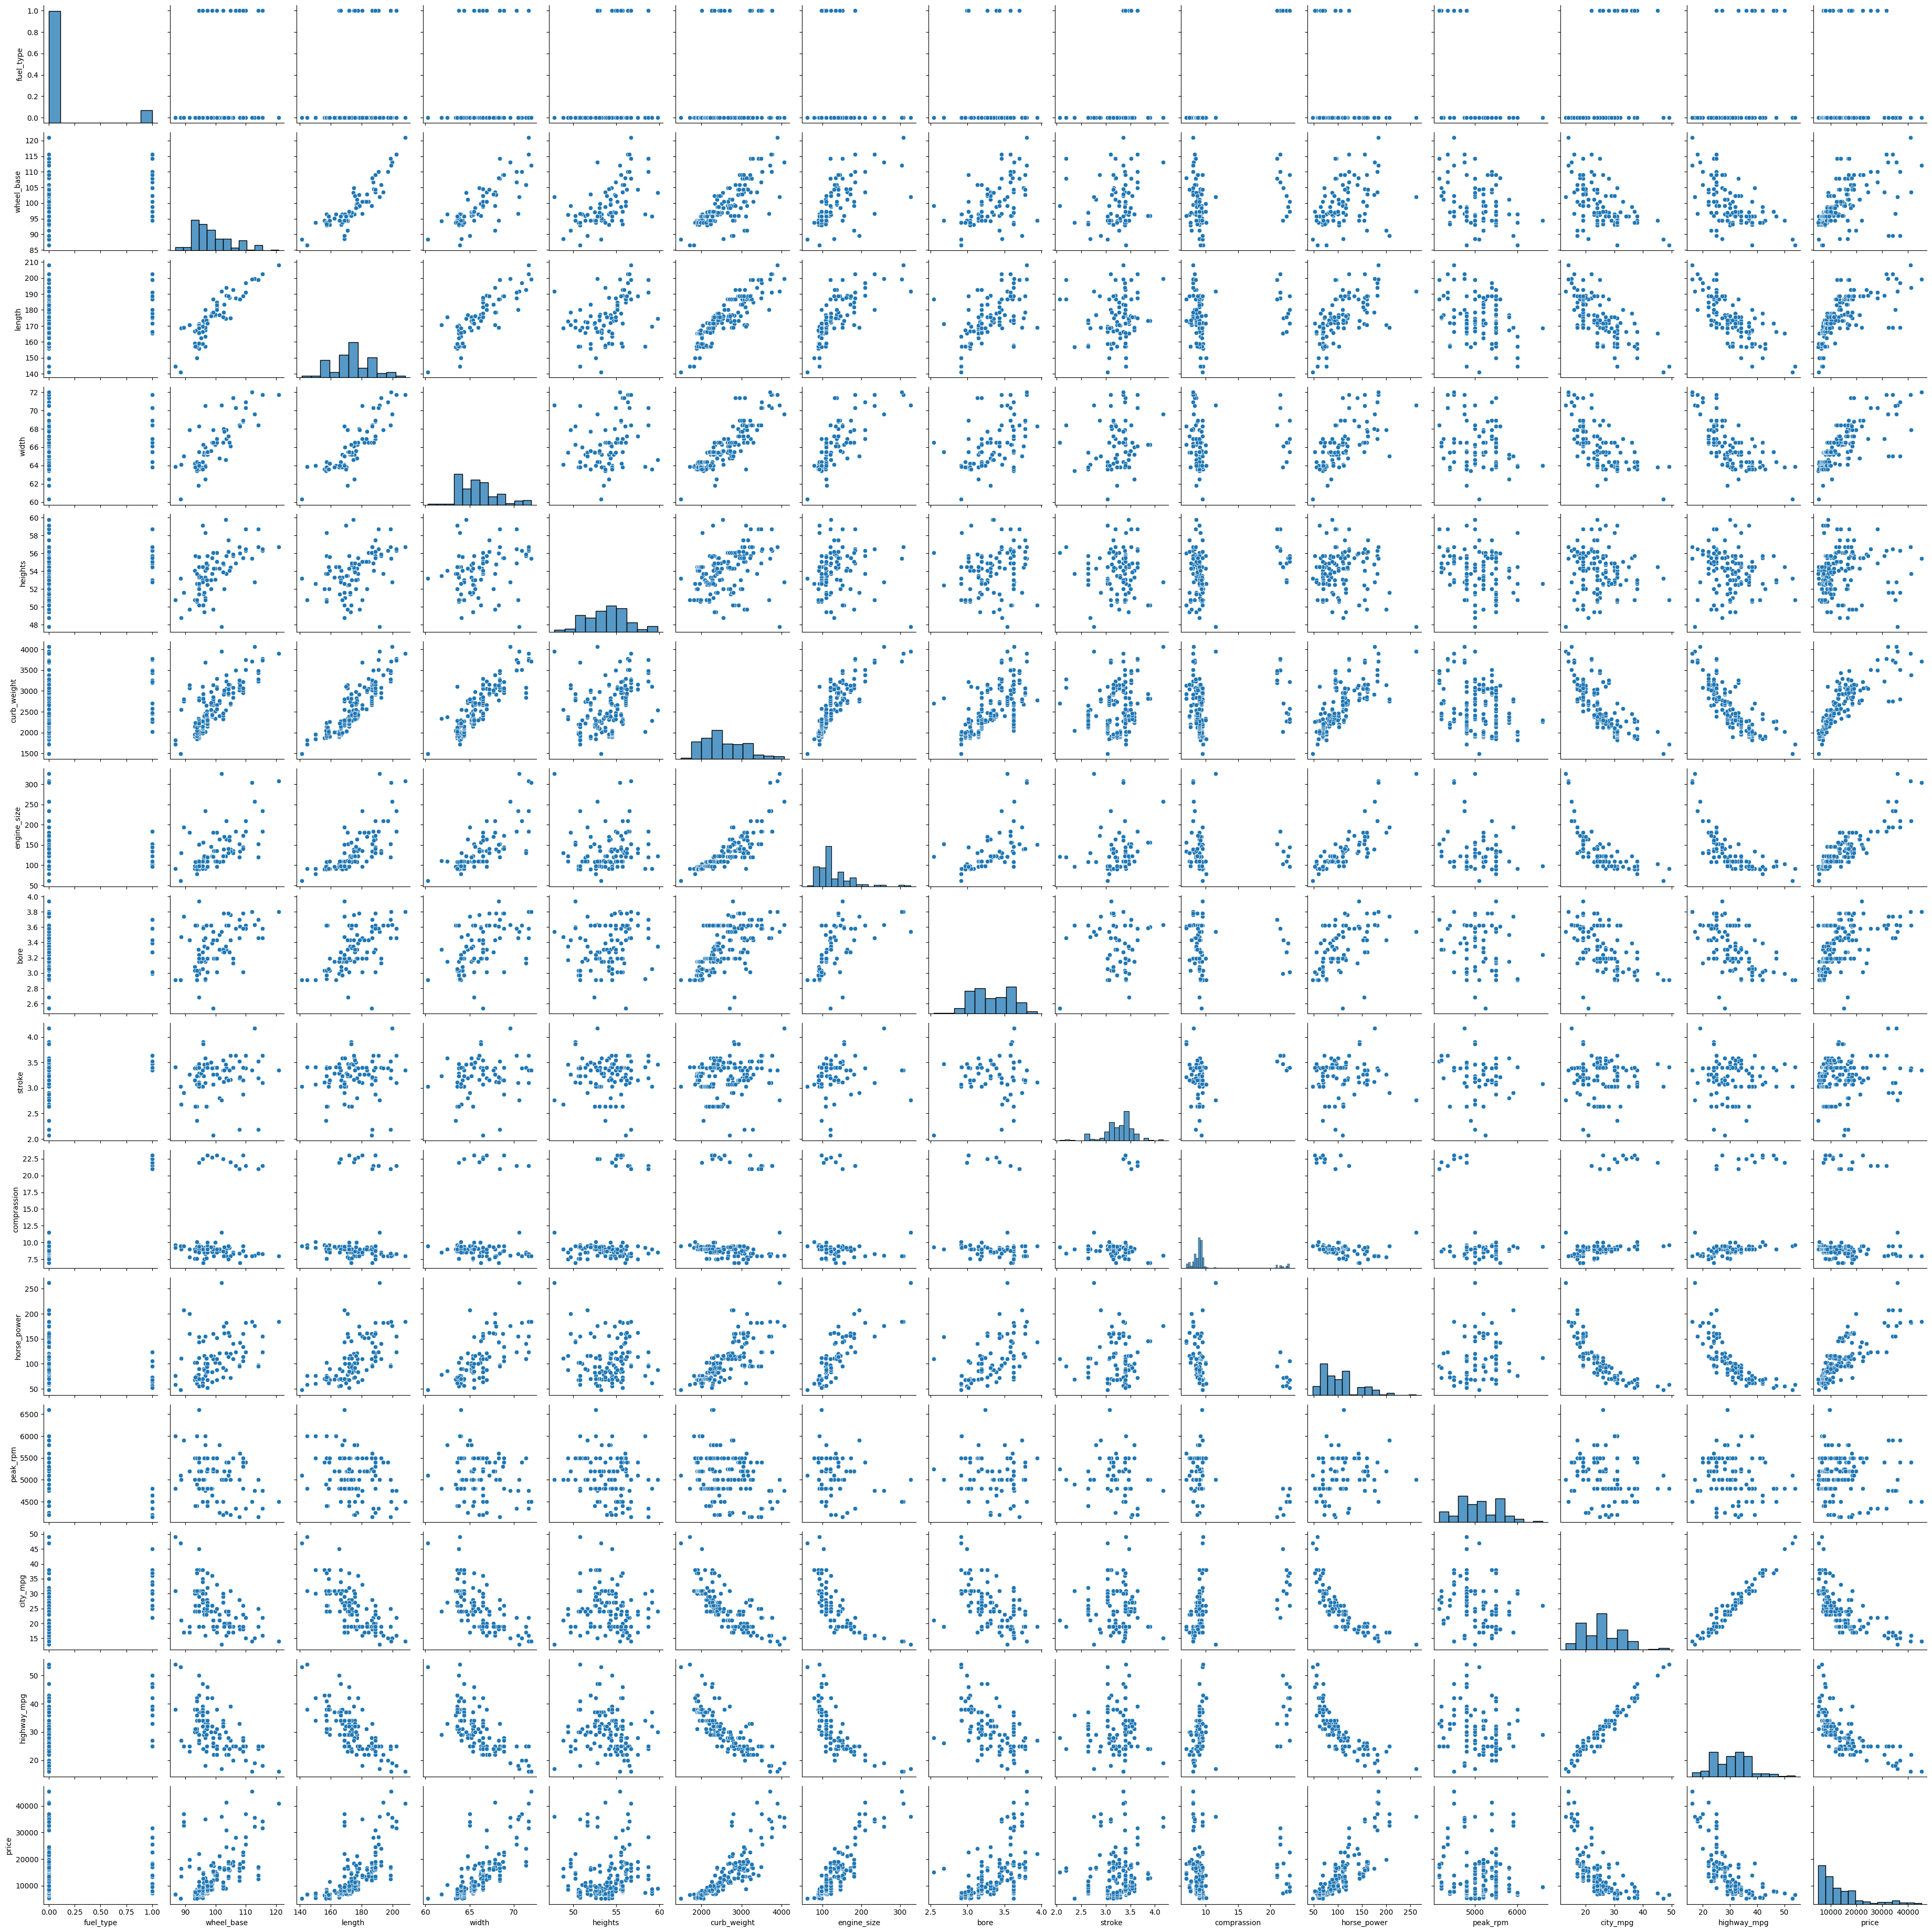

In [77]:
sns.pairplot(df2)

##Step 4 :Identifying significant correlations

In [78]:
df2.corr(method='pearson')

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
fuel_type,1.000000,0.303643,0.210618,0.245375,0.279070,0.219488,0.063490,0.056245,0.253774,0.985398,-0.168454,-0.480952,0.260796,0.193998,0.108968
wheel_base,0.303643,1.000000,0.879222,0.819009,0.592500,0.782720,0.569704,0.498228,0.171722,0.247730,0.375541,-0.352331,-0.499126,-0.566355,0.585793
length,0.210618,0.879222,1.000000,0.858084,0.496218,0.881665,0.687479,0.609437,0.118664,0.160172,0.583813,-0.280986,-0.689660,-0.719324,0.695331
width,0.245375,0.819009,0.858084,1.000000,0.315834,0.867315,0.740320,0.544311,0.186432,0.190997,0.616779,-0.251627,-0.647099,-0.692220,0.754273
heights,0.279070,0.592500,0.496218,0.315834,1.000000,0.307732,0.031286,0.189283,-0.055525,0.261160,-0.084412,-0.264078,-0.102367,-0.151188,0.138291
curb_weight,0.219488,0.782720,0.881665,0.867315,0.307732,1.000000,0.857573,0.645806,0.172785,0.155382,0.760285,-0.278944,-0.772171,-0.812710,0.835729
engine_size,0.063490,0.569704,0.687479,0.740320,0.031286,0.857573,1.000000,0.583091,0.211989,0.024617,0.842691,-0.219008,-0.710624,-0.732138,0.888942
bore,0.056245,0.498228,0.609437,0.544311,0.189283,0.645806,0.583091,1.000000,-0.066793,0.003057,0.568527,-0.277662,-0.591950,-0.600040,0.546873
stroke,0.253774,0.171722,0.118664,0.186432,-0.055525,0.172785,0.211989,-0.066793,1.000000,0.199882,0.100040,-0.068300,-0.027641,-0.036453,0.093746
comprassion,0.985398,0.247730,0.160172,0.190997,0.261160,0.155382,0.024617,0.003057,0.199882,1.000000,-0.214401,-0.444582,0.331413,0.267941,0.069500


<Axes: >

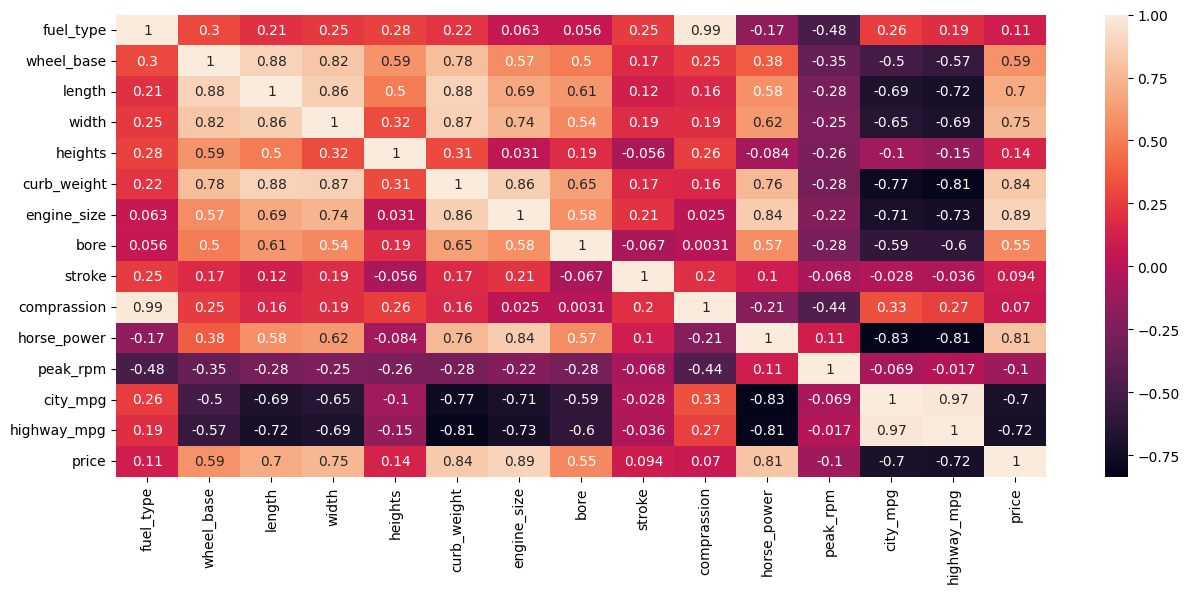

In [79]:
plt.figure(figsize=(15,6))
correlation= df2.corr('pearson')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot= True)

##Step 5: Detecting and Handling outliers

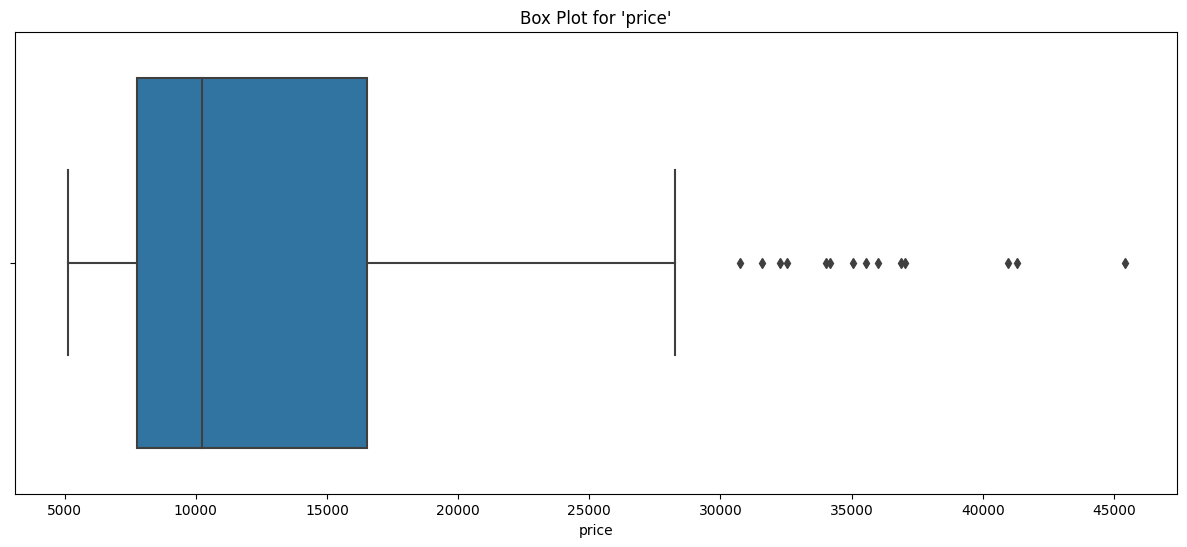

In [80]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df2['price'])
plt.title("Box Plot for 'price'")
plt.show()

In [81]:
df2[df2["price"] >30000]

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
14,0,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182.0,5400.0,16,22,30760
15,0,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8.0,182.0,5400.0,16,22,41315
16,0,110.0,197.0,70.9,56.3,3505,209,3.62,3.39,8.0,182.0,5400.0,15,20,36880
44,0,113.0,199.6,69.6,52.8,4066,258,3.63,4.17,8.1,176.0,4750.0,15,19,32250
45,0,113.0,199.6,69.6,52.8,4066,258,3.63,4.17,8.1,176.0,4750.0,15,19,35550
46,0,102.0,191.7,70.6,47.8,3950,326,3.54,2.76,11.5,262.0,5000.0,13,17,36000
67,1,115.6,202.6,71.7,56.3,3770,183,3.58,3.64,21.5,123.0,4350.0,22,25,31600
68,0,115.6,202.6,71.7,56.5,3740,234,3.46,3.10,8.3,155.0,4750.0,16,18,34184
69,0,96.6,180.3,70.5,50.8,3685,234,3.46,3.10,8.3,155.0,4750.0,16,18,35056
70,0,120.9,208.1,71.7,56.7,3900,308,3.80,3.35,8.0,184.0,4500.0,14,16,40960


In [82]:
df2.drop(14,inplace=True)
df2.drop(15,inplace=True)
df2.drop(16,inplace=True)
df2.drop(44,inplace=True)
df2.drop(45,inplace=True)
df2.drop(46,inplace=True)
df2.drop(65,inplace=True)
df2.drop(66,inplace=True)
df2.drop(67,inplace=True)
df2.drop(68,inplace=True)
df2.drop(69,inplace=True)
df2.drop(70,inplace=True)
df2.drop(71,inplace=True)
df2.drop(123,inplace=True)
df2.drop(124,inplace=True)
df2.drop(125,inplace=True)

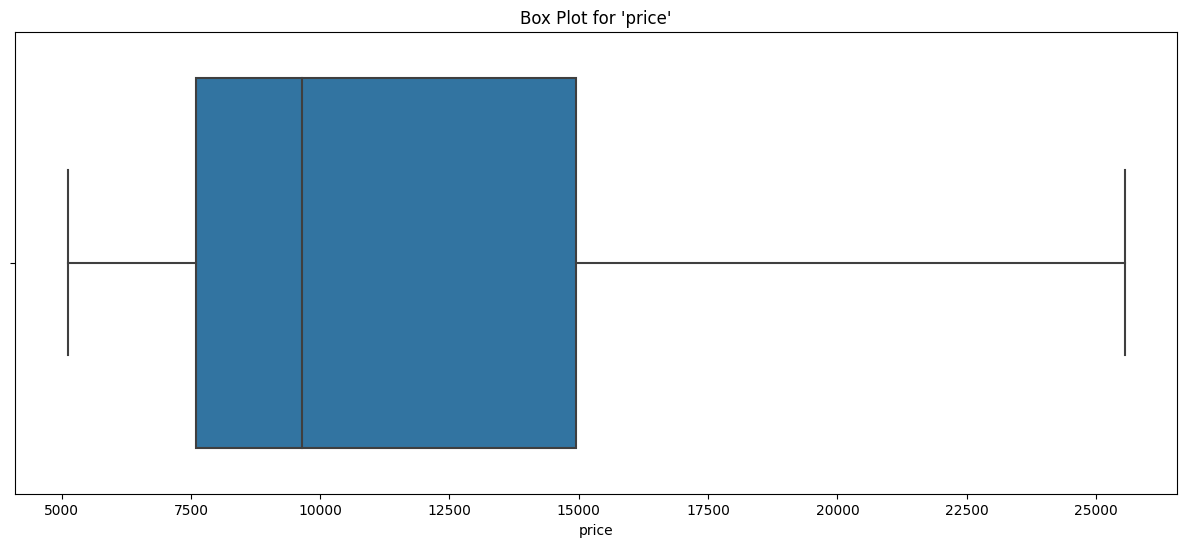

In [83]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df2['price'])
plt.title("Box Plot for 'price'")
plt.show()

# 3. Classification

### 3.1 Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC

In [84]:
#your code
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=746)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print("\nAUC Score:", roc_auc)


Confusion Matrix:
 [[50  0]
 [ 0  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59


AUC Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.2 Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC

In [85]:
#your code
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Create a Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model on the training data
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate the model
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)

# Print the results
print("Confusion Matrix:\n", conf_matrix_nb)
print("\nClassification Report:\n", classification_rep_nb)
print("\nAUC Score:", roc_auc_nb)


Confusion Matrix:
 [[50  0]
 [ 0  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59


AUC Score: 1.0


### 3.3 Use KNN to classify your data. First find the optimal k and than run you classification. Print/report your confusion matrix, classification report and AUC

In [86]:
#your code
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Create a KNN model
knn_model = KNeighborsClassifier()

# Define a range of k values to test
param_grid = {'n_neighbors': range(1, 20)}

# Use GridSearchCV to find the optimal k value
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the optimal k value
optimal_k = grid_search.best_params_['n_neighbors']

# Train the KNN model with the optimal k value
knn_model_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model_optimal.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_knn = knn_model_optimal.predict(X_test)

# Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

# Print the results
print("Optimal k value:", optimal_k)
print("Confusion Matrix:\n", conf_matrix_knn)
print("\nClassification Report:\n", classification_rep_knn)
print("\nAUC Score:", roc_auc_knn)


Optimal k value: 2
Confusion Matrix:
 [[50  0]
 [ 8  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        50
           1       1.00      0.11      0.20         9

    accuracy                           0.86        59
   macro avg       0.93      0.56      0.56        59
weighted avg       0.88      0.86      0.82        59


AUC Score: 0.5555555555555556


### 3.4 Choose one: SVM or Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC

In [87]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Create an SVM model
svm_model = SVC(probability=True, random_state=746)  # Set probability=True for AUC calculation

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_model.predict(X_test)

# Get predicted probabilities for AUC calculation
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# Print the results
print("Confusion Matrix:\n", conf_matrix_svm)
print("\nClassification Report:\n", classification_rep_svm)
print("\nAUC Score:", roc_auc_svm)


Confusion Matrix:
 [[50  0]
 [ 9  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        50
           1       0.00      0.00      0.00         9

    accuracy                           0.85        59
   macro avg       0.42      0.50      0.46        59
weighted avg       0.72      0.85      0.78        59


AUC Score: 0.8533333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.5 Compare your results and comment on your findings. Which one(s) did the best job? What could have been the problem with the ones that did not work? etc.

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Assuming X_train, X_test, y_train, and y_test are already defined

# Logistic Regression
logreg_model = LogisticRegression(random_state=746)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

# Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_nb = naive_bayes_model.predict(X_test)

# KNN with GridSearchCV for optimal k
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 20)}
grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
optimal_k = grid_search_knn.best_params_['n_neighbors']
knn_model_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model_optimal.fit(X_train, y_train)
y_pred_knn = knn_model_optimal.predict(X_test)

# SVM
svm_model = SVC(probability=True, random_state=746)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluate and Print Results
classifiers = ['Logistic Regression', 'Naive Bayes', 'KNN', 'SVM']
predictions = [y_pred_logreg, y_pred_nb, y_pred_knn, y_pred_svm]
probs = [None, None, None, y_prob_svm]

for clf, y_pred, prob in zip(classifiers, predictions, probs):
    print(f"\nResults for {clf}:\n")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    if prob is not None:
        roc_auc = roc_auc_score(y_test, prob)
        print(f"\nAUC Score: {roc_auc}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Results for Logistic Regression:

Confusion Matrix:
 [[50  0]
 [ 0  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59


Results for Naive Bayes:

Confusion Matrix:
 [[50  0]
 [ 0  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59


Results for KNN:

Confusion Matrix:
 [[50  0]
 [ 8  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Comparison has been made based on the findings and elaborated on the report.

## 4. Bonus question (5 extra points)
**Try to fix the inbalanced nature of the data with a tool from the lecture. Run one of the classification methods (preferable one that "failed" before) and see if you get better results.**

In [90]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Assuming X and y are defined as described earlier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train the SVM model
svm_model = SVC(probability=True)
# probability=True for AUC calculation
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
# Set zero_division parameter
print(classification_report(y_test, y_pred, zero_division=1))

# Calculate and print AUC
# Probability of class 1
y_prob = svm_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC (Area Under the Curve): {auc}")

Confusion Matrix:
[[37 13]
 [ 5  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        50
           1       0.24      0.44      0.31         9

    accuracy                           0.69        59
   macro avg       0.56      0.59      0.56        59
weighted avg       0.78      0.69      0.73        59


AUC (Area Under the Curve): 0.7
